In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins

In [2]:
df_collisions = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
print('Dataset downloaded and read into a pandas dataframe!')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset downloaded and read into a pandas dataframe!


In [3]:
severity_code = df_collisions['SEVERITYCODE'].values
severity_code

array([2, 1, 1, ..., 2, 2, 1])

In [4]:
severity_code = df_collisions['SEVERITYCODE'].values

labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

In [5]:
df_collisions ["SEVERITYCODE"] = severity_code

In [6]:
df_collisions.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,0.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,0.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,0.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,0.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,1.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,1.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [7]:
df_collisions.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

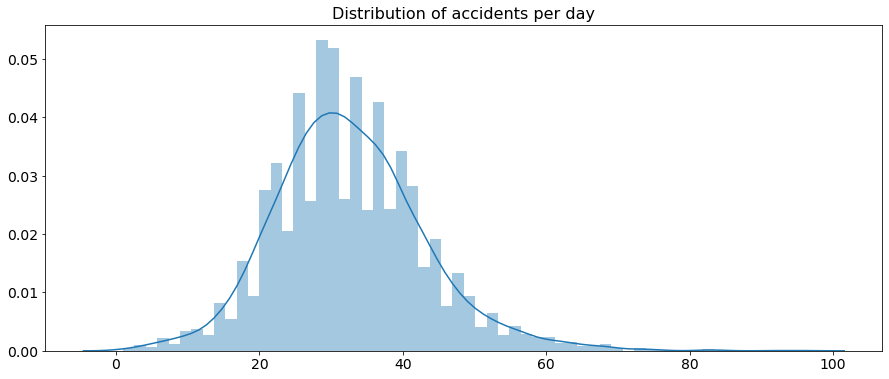

In [8]:
df_collisions["INCDATE"] = pd.to_datetime(df_collisions["INCDATE"]) 
df_collisions['year'] = df_collisions["INCDATE"].dt.year
df_collisions['month'] = df_collisions['INCDATE'].values.astype('datetime64[M]')
df_collisions.index = pd.DatetimeIndex(df_collisions['INCDATE'])
plt.figure(figsize=(15,6))
plt.title('Distribution of accidents per day', fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(df_collisions.resample('D').size(), bins=60);

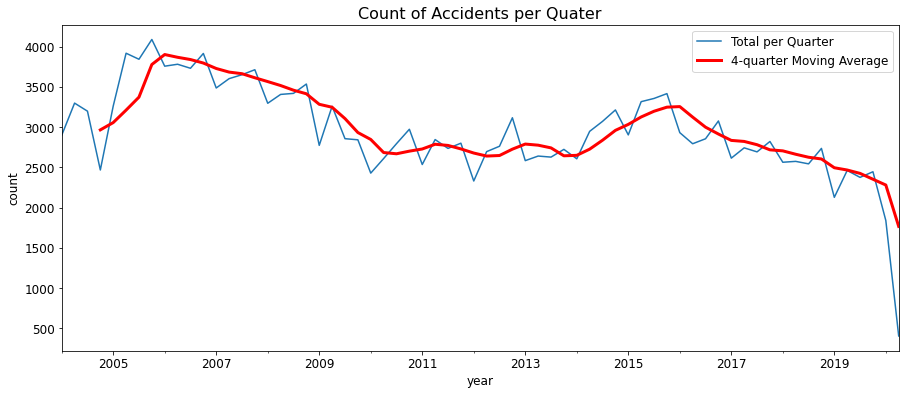

In [9]:
plt.figure(figsize=(15,6))
df_collisions.resample('Q').size().plot(label='Total per Quarter')
df_collisions.resample('Q').size().rolling(window=4).mean().plot(color='red', linewidth=3, label='4-quarter Moving Average')

plt.title('Count of Accidents per Quater', fontsize=16)
plt.xlabel('year', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(prop={'size':12})
plt.tick_params(labelsize=12)

In [10]:
df_collisions.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year,month
INCDATE,,,,,,,,,,,,,,,,,,,,,
2013-03-27 00:00:00+00:00,1,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,2013,2013-03-01
2006-12-20 00:00:00+00:00,0,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2006,2006-12-01
2004-11-18 00:00:00+00:00,0,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,2004,2004-11-01
2013-03-29 00:00:00+00:00,0,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,NaN,NaN,23,From same direction - all others,0,0,N,2013,2013-03-01
2004-01-28 00:00:00+00:00,1,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,2004,2004-01-01


In [11]:
df_collisions['INCKEY'].nunique()

194673

In [12]:
df_collisions["INATTENTIONIND"].replace("Y", 1, inplace=True)
df_collisions["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df_collisions['INCKEY'].nunique()

194673

In [13]:
df_collisions["UNDERINFL"].replace("N", 0, inplace=True)
df_collisions["UNDERINFL"].replace("Y", 1, inplace=True)
df_collisions["UNDERINFL"].replace(np.nan, 0, inplace=True)
df_collisions['INCKEY'].nunique()

194673

In [14]:
df_collisions["SPEEDING"].replace("Y", 1, inplace=True)
df_collisions["SPEEDING"].replace(np.nan, 0, inplace=True)
df_collisions['INCKEY'].nunique()

194673

In [15]:
df_collisions["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df_collisions["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df_collisions["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df_collisions["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df_collisions["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df_collisions["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df_collisions["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df_collisions["LIGHTCOND"].replace("Other","Unknown", inplace=True)
df_collisions["LIGHTCOND"].replace(np.nan,"Unknown", inplace=True)
df_collisions['INCKEY'].nunique()

194673

In [16]:
df_collisions["WEATHER"].replace("Clear", 0, inplace=True)
df_collisions["WEATHER"].replace("Raining", 2, inplace=True)
df_collisions["WEATHER"].replace("Overcast", 1, inplace=True)
df_collisions["WEATHER"].replace("Other", "Unknown", inplace=True)
df_collisions["WEATHER"].replace("Snowing", 3, inplace=True)
df_collisions["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df_collisions["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df_collisions["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df_collisions["WEATHER"].replace("Severe Crosswind", 3, inplace=True)
df_collisions["WEATHER"].replace("Partly Cloudy", 1, inplace=True)
df_collisions["WEATHER"].replace(np.nan,"Unknown", inplace=True)
df_collisions['INCKEY'].nunique()

194673

In [17]:
df_collisions["ROADCOND"].replace("Dry", 0, inplace=True)
df_collisions["ROADCOND"].replace("Wet", 1, inplace=True)
df_collisions["ROADCOND"].replace("Ice", 2, inplace=True)
df_collisions["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df_collisions["ROADCOND"].replace("Other", "Unknown", inplace=True)
df_collisions["ROADCOND"].replace("Standing Water", 2, inplace=True)
df_collisions["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df_collisions["ROADCOND"].replace("Oil", 2, inplace=True)
df_collisions["ROADCOND"].replace(np.nan,"Unknown", inplace=True)
df_collisions['INCKEY'].nunique()

194673

In [18]:
lightcond_size = df_collisions ["LIGHTCOND"].size
lightcond_size

194673

In [19]:
unknowninlightcond = df_collisions ['LIGHTCOND'] == 'Unknown'
lightcond = df_collisions['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[unknowninlightcond]

lightcond.size

18878

In [20]:
lightcond[0:13098]=0
lightcond[13098:18570]=1
lightcond[18570:18879]=2

df_collisions.loc [df_collisions.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

df_collisions["LIGHTCOND"]=df_collisions["LIGHTCOND"].astype(int)

df_collisions['INCKEY'].nunique()

194673

In [21]:
unknowninroadcond = df_collisions ['ROADCOND'] == 'Unknown'
roadcond = df_collisions['ROADCOND']
roadcond = roadcond.values
roadcond = roadcond[unknowninroadcond]

roadcond.size

20222

In [22]:
roadcond[0:14433]=0
roadcond[14433:5472]=1
roadcond[5472:20223]=2

df_collisions.loc [df_collisions.ROADCOND == "Unknown", 'ROADCOND'] = roadcond

df_collisions["ROADCOND"]=df_collisions["ROADCOND"].astype(int)

df_collisions['INCKEY'].nunique()

194673

In [23]:
unknowninweather = df_collisions ['WEATHER'] == 'Unknown'
weather = df_collisions['WEATHER']
weather = weather.values
weather = weather[unknowninweather]

weather.size

21004

In [24]:
weather[0:13442]=0
weather[13442:16794]=1
weather[16794:20878]=2
weather[20878:21005]=3

df_collisions.loc [df_collisions.WEATHER == "Unknown", 'WEATHER'] = weather

df_collisions["WEATHER"]=df_collisions["WEATHER"].astype(int)

df_collisions['INCKEY'].nunique()

194673

In [25]:
df_collisions["SPEEDING"]=df_collisions["SPEEDING"].astype(int)

In [26]:
df_collisions["INATTENTIONIND"]=df_collisions["INATTENTIONIND"].astype(int)

In [27]:
df_collisions["UNDERINFL"]=df_collisions["UNDERINFL"].astype(int)

<AxesSubplot:xlabel='count', ylabel='INATTENTIONIND'>

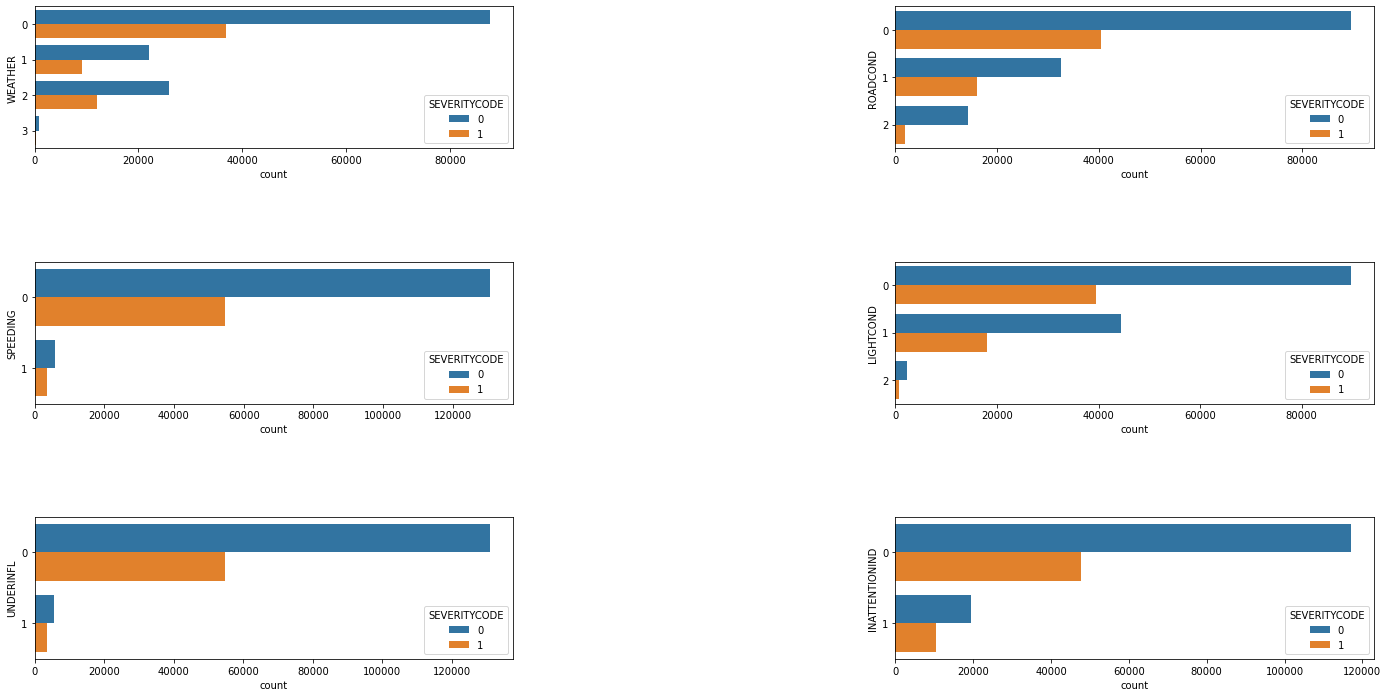

In [28]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(24,12))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)
sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df_collisions, ax=axs[0, 0])
sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df_collisions, ax=axs[0, 1])
sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df_collisions, ax=axs[1, 1])
sns.countplot(y="SPEEDING", hue="SEVERITYCODE", data=df_collisions, ax=axs[1, 0])
sns.countplot(y="UNDERINFL", hue="SEVERITYCODE", data=df_collisions, ax=axs[2, 0])
sns.countplot(y="INATTENTIONIND", hue="SEVERITYCODE", data=df_collisions, ax=axs[2, 1])

In [29]:
X = df_collisions[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING"]].values
y = df_collisions[["SEVERITYCODE"]].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (136271, 6) (136271, 1)
Test set: (58402, 6) (58402, 1)


1: 136485
2: 58188
Proportion: 2.35 : 1


<AxesSubplot:title={'center':'Count of Incidents by Severity Code'}, xlabel='Severity Code(modified)', ylabel='Count'>

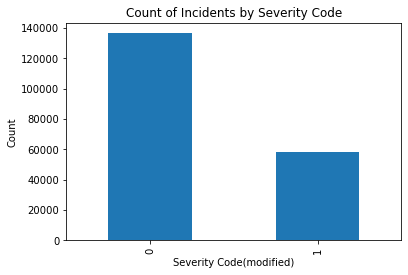

In [31]:
severitycode_count = df_collisions.SEVERITYCODE.value_counts()
print('1:', severitycode_count[0])
print('2:', severitycode_count[1])
print('Proportion:', round(severitycode_count[0] / severitycode_count[1], 2), ': 1')

severitycode_count.plot(kind='bar', title='Count of Incidents by Severity Code', xlabel=('Severity Code(modified)'), ylabel=('Count'))


In [32]:
!pip install imblearn

In [33]:
pip install -U scikit-learn


Requirement already up-to-date: scikit-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.23.2)
Note: you may need to restart the kernel to use updated packages.


In [34]:
from imblearn import over_sampling

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

In [37]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
drugTree.fit(os_data_X,os_data_y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [38]:
predTree = drugTree.predict(X_test)

In [39]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(predTree, y_test))

DecisionTrees's Accuracy:  0.43772473545426527


In [40]:
from sklearn.metrics import jaccard_score

In [41]:
jaccard_score(y_test, predTree)

0.3034532496181911

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predTree, labels=[1,0]))

[[14306  3249]
 [29589 11258]]


Confusion matrix, without normalization
[[14306  3249]
 [29589 11258]]


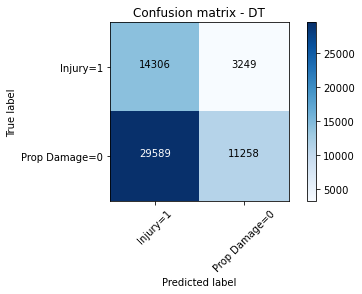

In [43]:
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Prop Damage=0'],normalize= False,  title='Confusion matrix - DT')

In [44]:
from sklearn.metrics import jaccard_score
print (classification_report(y_test, predTree))
jaccard_score(y_test, predTree)

              precision    recall  f1-score   support

           0       0.78      0.28      0.41     40847
           1       0.33      0.81      0.47     17555

    accuracy                           0.44     58402
   macro avg       0.55      0.55      0.44     58402
weighted avg       0.64      0.44      0.42     58402



0.3034532496181911

In [45]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_data_X,os_data_y)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [46]:
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.53, 0.47],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       ...,
       [0.5 , 0.5 ],
       [0.49, 0.51],
       [0.5 , 0.5 ]])

In [47]:
jaccard_score(y_test, yhatLR)

0.2922452660054103

In [48]:
print ("Accuracy", accuracy_score(yhatLR, y_test))
print (classification_report(y_test, yhatLR))

cnf_matrix1 = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)

Accuracy 0.46241567069620904
              precision    recall  f1-score   support

           0       0.75      0.34      0.47     40847
           1       0.33      0.74      0.45     17555

    accuracy                           0.46     58402
   macro avg       0.54      0.54      0.46     58402
weighted avg       0.63      0.46      0.47     58402



Confusion matrix, without normalization
[[12964  4591]
 [26805 14042]]


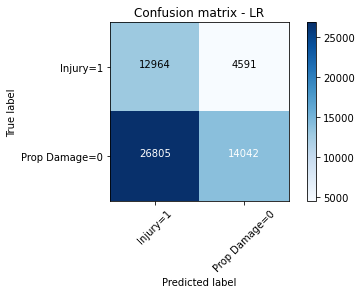

In [49]:
plt.figure()
plot_confusion_matrix(cnf_matrix1, classes=['Injury=1','Prop Damage=0'],normalize= False,  title='Confusion matrix - LR')

In [50]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(os_data_X,os_data_y)
neigh

KNeighborsClassifier(n_neighbors=4)

In [51]:
yhatKNN = neigh.predict(X_test)

In [52]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatKNN))

Train set Accuracy:  0.5420302191955735
Test set Accuracy:  0.5394678264442998


In [53]:
print ("Accuracy", accuracy_score(yhatKNN, y_test))
print (classification_report(y_test, yhatKNN))

cnf_matrix2 = confusion_matrix(y_test, yhatKNN, labels=[1,0])
np.set_printoptions(precision=2)

jaccard_score(y_test, yhatKNN)

Accuracy 0.5394678264442998
              precision    recall  f1-score   support

           0       0.70      0.59      0.64     40847
           1       0.31      0.43      0.36     17555

    accuracy                           0.54     58402
   macro avg       0.51      0.51      0.50     58402
weighted avg       0.59      0.54      0.56     58402



0.21754814685518123

In [ ]:
Ks = 9
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
      
    neigh = KNeighborsClassifier(n_neighbors = n).fit(os_data_X,os_data_y)
    yhatKNN=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatKNN)

    
    std_acc[n-1]=np.std(yhatKNN==y_test)/np.sqrt(yhatKNN.shape[0])

mean_acc
    
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Confusion matrix, without normalization
[[ 7478 10077]
 [16819 24028]]


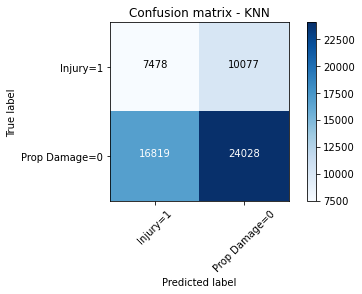

In [54]:
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=['Injury=1','Prop Damage=0'],normalize= False,  title='Confusion matrix - KNN')